In [2]:
!pip install tushare
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

     |████████████████████████████████| 214 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 129 kB 12.8 MB/s 
--2021-07-24 11:35:34--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  16.7MB/s    in 0.6s    

2021-07-24 11:35:35 (16.7 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
import tushare as ts
def get_daily_ret(code='sh',start='2000-01-01',end='2019-12-31'):
    df=ts.get_k_data(code,start=start,end=end)
    df.index=pd.to_datetime(df.date)
    #计算日收益率
    daily_ret = df['close'].pct_change()
    #删除缺失值
    daily_ret.dropna(inplace=True)
    return daily_ret

In [4]:
def plot_mnthly_ret(code,title):
    daily_ret = get_daily_ret(code)
    #月度收益率
    mnthly_ret = daily_ret.resample('M').apply(lambda x : ((1+x).prod()-1))
    #可视化
    plt.rcParams['figure.figsize']=[20,5]
    mnthly_ret.plot()
    start_date=mnthly_ret.index[0]
    end_date=mnthly_ret.index[-1]
    plt.xticks(pd.date_range(start_date,end_date,freq='Y'),[str(y) for y in range(start_date.year+1,end_date.year+1)])
    #显示月收益率大于3/4分位数的点
    dates=mnthly_ret[mnthly_ret>mnthly_ret.quantile(0.75)].index   
    for i in range(0,len(dates)):
        plt.scatter(dates[i], mnthly_ret[dates[i]],color='r')
    labs = mpatches.Patch(color='red',alpha=.5, label="月收益率高于3/4分位")
    plt.title(title+'月度收益率',size=15)
    plt.legend(handles=[labs])
    plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

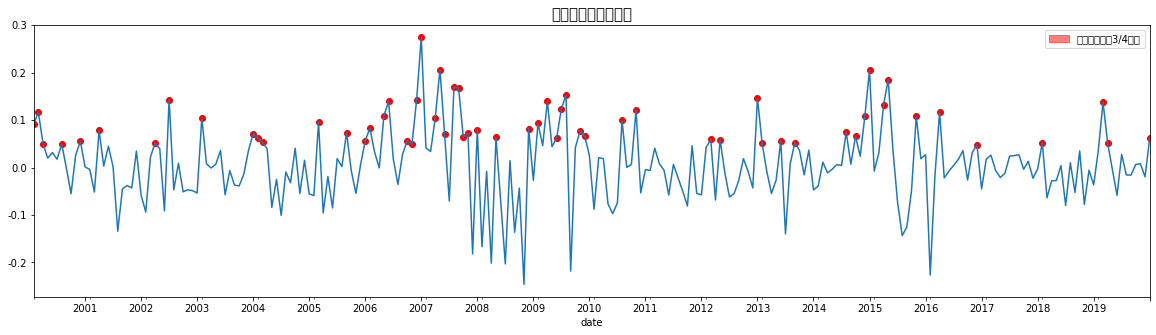

In [5]:
plot_mnthly_ret('sh','上证综指')

In [ ]:
plot_mnthly_ret('cyb','创业板')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [ ]:
def plot_votil(code,title):
    #月度收益率的年化标准差（波动率）
    daily_ret=get_daily_ret(code)
    mnthly_annu = daily_ret.resample('M').std()* np.sqrt(12)
    plt.rcParams['figure.figsize']=[20,5]
    mnthly_annu.plot()
    start_date=mnthly_annu.index[0]
    end_date=mnthly_annu.index[-1]
    plt.xticks(pd.date_range(start_date,end_date,freq='Y'),[str(y) for y in range(start_date.year+1,end_date.year+1)])
    dates=mnthly_annu[mnthly_annu>0.07].index
    for i in range(0,len(dates)-1,3):
        plt.axvspan(dates[i],dates[i+1],color='r',alpha=.5)
    plt.title(title+'月度收益率标准差',size=15)
    labs = mpatches.Patch(color='red',alpha=.5, label="波动集聚")
    plt.legend(handles=[labs])
    plt.show()

In [ ]:
plot_votil('sh','上证综指')

In [ ]:
plot_votil('cyb','创业板')

In [ ]:
from pyecharts import Bar
#pyecharts是0.5.11版本
def plot_mean_ret(code,title):
    daily_ret = get_daily_ret(code)
    #月度收益率
    mnthly_ret = daily_ret.resample('M').apply(lambda x : ((1+x).prod()-1))
    mrets=(mnthly_ret.groupby(mnthly_ret.index.month).mean()*100).round(2) 
    attr=[str(i)+'月' for i in range(1,13)]
    v=list(mrets)
    bar=Bar(title+'月平均收益率%')
    bar.add('',attr,v,
       is_label_show=True)
    return bar
plot_mean_ret('sh','上证综指')


In [ ]:
plot_mean_ret('cyb','创业板')

In [ ]:
def month_ret_stats(code):
    daily_ret = get_daily_ret(code)
    #月度收益率
    mnthly_ret = daily_ret.resample('M').apply(lambda x : ((1+x).prod()-1))
    ret_stats=mnthly_ret.groupby(mnthly_ret.index.month).describe()
    pnm=ret_stats[ret_stats['mean']>0.01].index.to_list()
    nnm=ret_stats[ret_stats['mean']<-0.01].index.to_list()
    return pnm,nnm

In [ ]:
def Month_Strategy(code,is_short):
    daily_ret = get_daily_ret(code)
    #月度收益率
    mnthly_ret = daily_ret.resample('M').apply(lambda x : ((1+x).prod()-1))
    #设计买卖信号
    df=pd.DataFrame(mnthly_ret.values,index=mnthly_ret.index,columns=['ret'])
    #做多月份
    pnm,nnm=month_ret_stats(code)
    print(f'做多月份：{pnm}')
    df['signal']=0
    for m in pnm:
        df.loc[df.index.month==m,'signal']=1
    #如果可以做空
    if is_short==True:
        for n in nnm:
            df.loc[df.index.month==n,'signal']=-1
        print(f'做空月份：{nnm}')

    df['capital_ret']=df.ret.mul(df.signal)
    #计算标的、策略的累计收益率
    df['策略净值']=(df.capital_ret+1.0).cumprod()
    df['指数净值']=(df.ret+1.0).cumprod()
    return df

In [ ]:
def performance(df):
     #代码较长，此处略
#将上述函数整合成一个执行函数
def main(code='sh',name='上证综指',is_short=False):
    df=Month_Strategy(code,is_short)
    print(f'回测标的：{name}指数')
    performance(df)
    plot_performance(df,name)